In [1]:
# This approach feeds the 31 (31 x embedding_dim) features to the attention mechanism as a sequence rather than as an embedding of one "token" (1 x 31).

In [ ]:
# Performance remains the same compared to the pytorch models with sequence length 1, which might indicate, that the attention mechanism does not really capture substantial relations

In [2]:
# This code rates feature importance by their attention scores (Attention is not Explanation!!!).
# The prediction treshold is also turned a little bit down to increase recall.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Dense, MultiHeadAttention, Add, LayerNormalization,
                                     Flatten, Dropout, TimeDistributed)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

2024-09-25 05:20:48.384346: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<KerasTensor shape=(None, 31, 1), dtype=float32, sparse=False, name=input_layer>
<KerasTensor shape=(None, 31, 8), dtype=float32, sparse=False, name=keras_tensor_59>


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 31, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_5  │ (None, 31, 8)     │         16 │ input_layer[0][0] │
│ (TimeDistributed)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ [(None, 31, 8),   │        288 │ time_distributed… │
│ (MultiHeadAttentio… │ (None, 2, 31,     │            │ time_distributed… │
│                     │ 31)]              │            │ time_distributed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 31, 8)     │          0 │ time_distributed… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 31, 8)     │         16 │ add_5[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 248)       │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │     15,936 │ flatten_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │      2,080 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 1)         │         33 │ dropout_2[0][0]   │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 18,369 (71.75 KB)

 Trainable params: 18,369 (71.75 KB)

 Non-trainable params: 0 (0.00 B)

7121/7121 ━━━━━━━━━━━━━━━━━━━━ 38s 5ms/step - accuracy: 0.9959 - loss: 0.0120 - val_accuracy: 0.9994 - val_loss: 0.0031
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


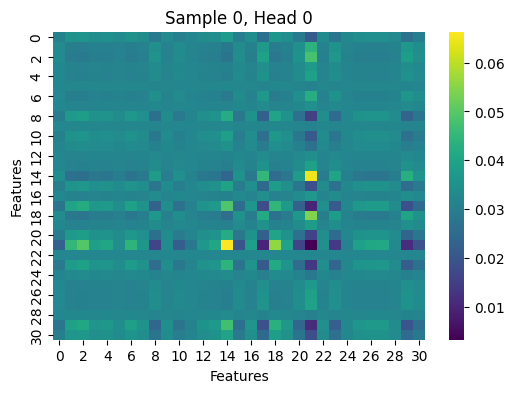

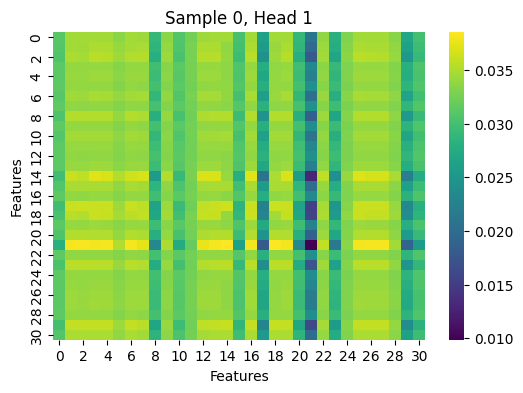

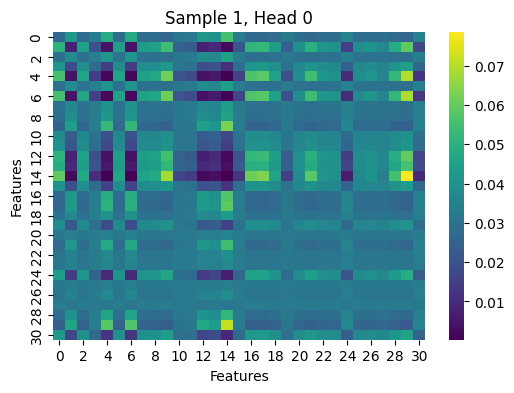

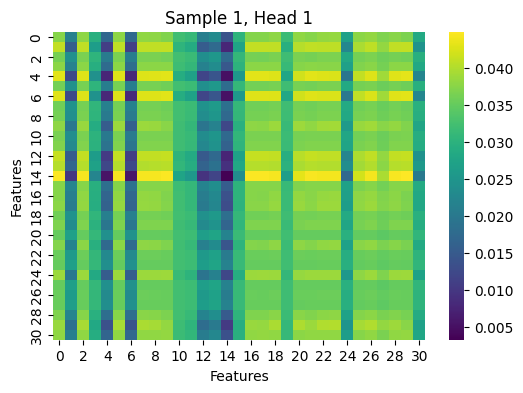

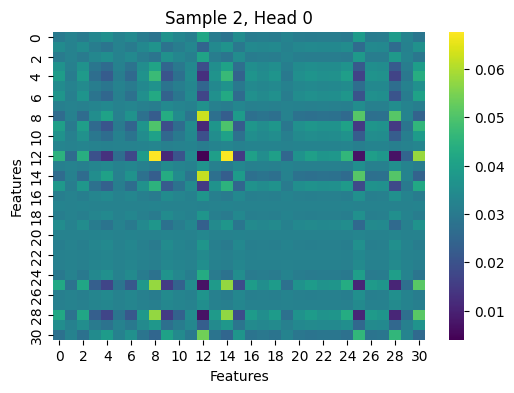

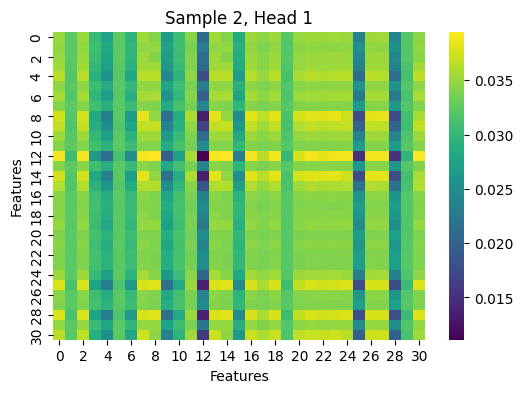

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
Test Accuracy: 0.9992
Precision: 0.7155
Recall (TPR): 0.8469
TNR: 0.9994
F1 Score: 0.7757
ROC AUC: 0.9907


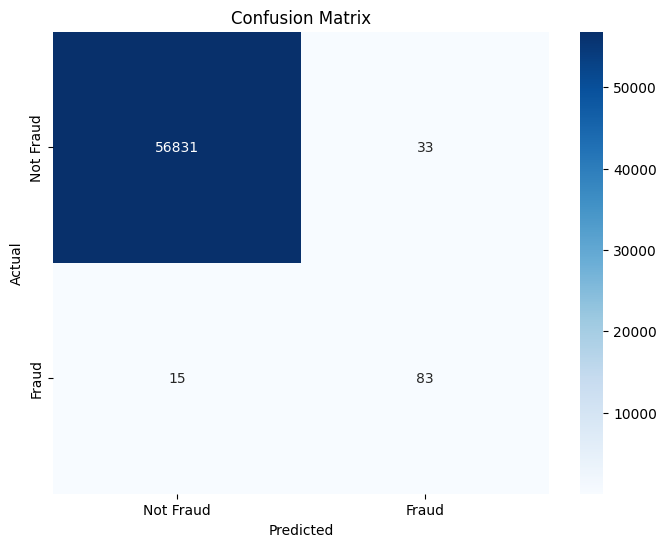

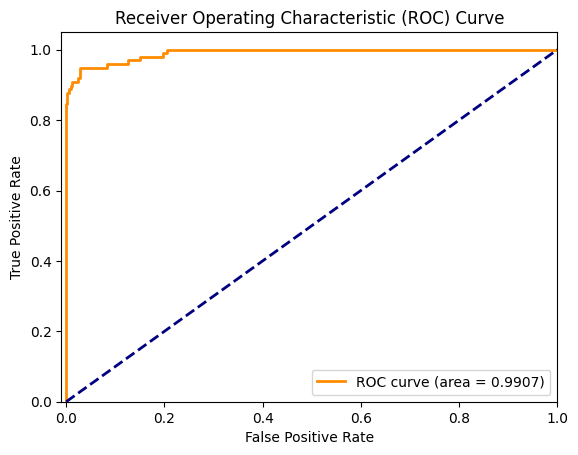

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Sample 1:
True Label: Fraud
Predicted Probability: 0.7859
Predicted Class: Fraud

Top 5 Features Contributing to the Prediction:
        Feature  Attention Score
            V21        10.920935
             V8         4.737767
            V19         1.219463
            V25         1.167313
cos_tot_seconds         1.161725

--------------------------------------------------

Sample 2:
True Label: Fraud
Predicted Probability: 0.0000
Predicted Class: Not Fraud

Top 5 Features Contributing to the Prediction:
Feature  Attention Score
     V4         1.242247
     V5         1.177482
     V7         1.159485
    V10         1.147959
     V2         1.145042

--------------------------------------------------

Sample 3:
True Label: Fraud
Predicted Probability: 0.8822
Predicted Class: Fraud

Top 5 Features Contributing to the Prediction:
Feature  Attention Score
    V11         1.615683
     V4         1.525860
    

In [ ]:

# Load Data
file_path = 'creditcard.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Feature Engineering
X = data.drop('Class', axis=1)
tot_seconds = X['Time']
X['sin_tot_seconds'] = np.sin(2 * np.pi * tot_seconds / (24 * 60 * 60))
X['cos_tot_seconds'] = np.cos(2 * np.pi * tot_seconds / (24 * 60 * 60))
X = X.drop('Time', axis=1)

amount_pt = PowerTransformer(method='box-cox')
X['Amount'] = amount_pt.fit_transform(X[['Amount']] + 1e-9)

y = data['Class']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape Data to Treat Features as Sequence
num_samples = X_scaled.shape[0]
sequence_length = X_scaled.shape[1]  # Number of features
feature_dimension = 1  # Since each feature is a scalar

# Reshape X_scaled to (num_samples, sequence_length, feature_dimension)
X_reshaped = X_scaled.reshape((num_samples, sequence_length, feature_dimension))

# Ensure class labels are integers and NumPy arrays
y = y.values.astype(int)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y, test_size=0.2, random_state=22, stratify=y
)

# Model Parameters
input_shape = (sequence_length, feature_dimension)
embedding_dim = 8  # Dimension of the feature embeddings
num_heads = 2
key_dim = embedding_dim // num_heads  # Key dimension for attention
num_classes = 1

# Model Definition
inputs = Input(shape=input_shape, name='input_layer')
print(inputs)

# MLP Layer to Create Feature Embeddings
x = TimeDistributed(Dense(embedding_dim, activation='relu'))(inputs)
# x has shape: (batch_size, sequence_length, embedding_dim)

# Multi-Head Attention
attn_layer = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)
attn_output, attn_scores = attn_layer(x, x, x, return_attention_scores=True)

# Residual Connection and Normalization
x = Add()([x, attn_output])
x = LayerNormalization()(x)
print(x)

# Flatten and Feed-Forward Network
x = Flatten()(x)
x = Dense(64, activation='relu', name='dense_1')(x)
x = Dropout(0.2, name='dropout_1')(x)
x = Dense(32, activation='relu', name='dense_2')(x)
x = Dropout(0.2, name='dropout_2')(x)
outputs = Dense(num_classes, activation='sigmoid', name='output_layer')(x)

# Build and Compile Model
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=1,
    callbacks=[early_stopping]
)

# Create a model to output attention scores
attention_model = Model(inputs=inputs, outputs=attn_scores)

# Get attention scores on test data
attention_scores = attention_model.predict(X_test)

# attention_scores shape: (num_samples, num_heads, seq_len_q, seq_len_k)
# Since seq_len_q = seq_len_k = sequence_length, we can visualize attention matrices

# Plotting attention heads for the first N samples
N = num_heads  # Number of samples to plot
for i in range(3):
    for h in range(N):
        plt.figure(figsize=(6, 4))
        sns.heatmap(attention_scores[i, h], cmap='viridis')
        plt.title(f'Sample {i}, Head {h}')
        plt.xlabel('Features')
        plt.ylabel('Features')
        plt.show()

# Evaluation
y_probs = model.predict(X_test)
y_preds = (y_probs > 0.04).astype(int).flatten()

# Metrics
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds, zero_division=0)
recall = recall_score(y_test, y_preds, zero_division=0)
f1 = f1_score(y_test, y_preds, zero_division=0)
roc_auc = roc_auc_score(y_test, y_probs)

tpr = recall
cm = confusion_matrix(y_test, y_preds)
tn, fp, fn, tp = cm.ravel()
tnr = tn / (tn + fp)

# Print Metrics
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall (TPR): {tpr:.4f}')
print(f'TNR: {tnr:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve Plot
fpr, tpr_curve, _ = roc_curve(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr_curve, color='darkorange',
         lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Step 1: Select Samples from the Test Set

# Separate positive and negative samples
X_test_positive = X_test[y_test == 1]
X_test_negative = X_test[y_test == 0]

y_test_positive = y_test[y_test == 1]
y_test_negative = y_test[y_test == 0]

# Randomly select 5 samples from each class
num_samples_per_class = 5

np.random.seed(22)  # For reproducibility

positive_indices = np.random.choice(len(X_test_positive), num_samples_per_class, replace=False)
negative_indices = np.random.choice(len(X_test_negative), num_samples_per_class, replace=False)

X_samples_positive = X_test_positive[positive_indices]
y_samples_positive = y_test_positive[positive_indices]

X_samples_negative = X_test_negative[negative_indices]
y_samples_negative = y_test_negative[negative_indices]

# Combine positive and negative samples
X_samples = np.concatenate((X_samples_positive, X_samples_negative), axis=0)
y_samples = np.concatenate((y_samples_positive, y_samples_negative), axis=0)

# Step 2: Make Predictions on the Selected Samples

# Get predictions
y_probs_samples = model.predict(X_samples)
y_preds_samples = (y_probs_samples > 0.04).astype(int).flatten()

# Step 3: Obtain Attention Scores for the Selected Samples

# Get attention scores
attention_scores_samples = attention_model.predict(X_samples)

# Step 4: Analyze Attention Scores to Determine Feature Importance

# Compute average attention scores across all heads for each sample
average_attention_scores = attention_scores_samples.mean(axis=1)  # Shape: (num_samples, seq_len_q, seq_len_k)

# Sum attention scores to get importance per feature
feature_importance = average_attention_scores.sum(axis=1)  # Shape: (num_samples, seq_len_k)

# Step 5: Map Feature Indices to Feature Names

# Get feature names (after preprocessing)
feature_names = X.columns.tolist()

# Step 6: Explain Outputs Using Feature Importance

for i in range(len(X_samples)):
    print(f"Sample {i + 1}:")
    print(f"True Label: {'Fraud' if y_samples[i] == 1 else 'Not Fraud'}")
    print(f"Predicted Probability: {y_probs_samples[i][0]:.4f}")
    print(f"Predicted Class: {'Fraud' if y_preds_samples[i] == 1 else 'Not Fraud'}")

    # Get feature importance for the sample
    importance_scores = feature_importance[i]

    # Create a DataFrame for feature importance
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Attention Score': importance_scores
    })

    # Sort features by attention score
    importance_df = importance_df.sort_values(by='Attention Score', ascending=False)

    # Display top 5 features
    print("\nTop 5 Features Contributing to the Prediction:")
    print(importance_df.head(5).to_string(index=False))
    print("\n" + "-" * 50 + "\n")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score


# Step 1: Define a function to calculate metrics for different thresholds
def get_metrics_for_thresholds(y_true, y_probs, thresholds):
    metrics = {'threshold': [], 'precision': [], 'recall': [], 'f1': [], 'accuracy': [], 'roc_auc': []}

    for threshold in thresholds:
        y_preds = (y_probs >= threshold).astype(int)

        precision = precision_score(y_true, y_preds, zero_division=0)
        recall = recall_score(y_true, y_preds, zero_division=0)
        f1 = f1_score(y_true, y_preds, zero_division=0)
        accuracy = accuracy_score(y_true, y_preds)
        roc_auc = roc_auc_score(y_true, y_probs)

        metrics['threshold'].append(threshold)
        metrics['precision'].append(precision)
        metrics['recall'].append(recall)
        metrics['f1'].append(f1)
        metrics['accuracy'].append(accuracy)
        metrics['roc_auc'].append(roc_auc)

    return metrics


# Step 2: Define the thresholds and calculate the metrics
thresholds = np.arange(0.0, 1.01, 0.01)  # Thresholds from 0 to 1 with step 0.01 for a smoother curve
metrics = get_metrics_for_thresholds(y_test, y_probs, thresholds)

# Step 3: Plot the metrics against thresholds
plt.figure(figsize=(12, 8))

plt.plot(metrics['threshold'], metrics['precision'], label='Precision', linestyle='-', marker=None)
plt.plot(metrics['threshold'], metrics['recall'], label='Recall', linestyle='-', marker=None)
plt.plot(metrics['threshold'], metrics['f1'], label='F1 Score', linestyle='-', marker=None)
plt.plot(metrics['threshold'], metrics['accuracy'], label='Accuracy', linestyle='-', marker=None)
plt.plot(metrics['threshold'], metrics['roc_auc'], label='ROC AUC', linestyle='-', marker=None)

plt.xlabel('Threshold')
plt.ylabel('Metric')
plt.title('Metrics vs Threshold (Continuous)')
plt.legend(loc='best')
plt.grid(True)
plt.show()
